<a href="https://colab.research.google.com/github/Ashwin-2408/Tensor_Flow_Learning/blob/main/notebooks/Computer_Vision_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolution Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can identify patterns in visual data.

## Get Data

The images we are using are from the kaggle 101 food dataset. Link : https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified the dataset and choose to work with only steak and pizza.

In [48]:
import zipfile
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the zip file
zipref=zipfile.ZipFile("pizza_steak.zip")
zipref.extractall()
zipref.close()

--2025-06-14 17:27:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   218MB/s    in 0.5s    

2025-06-14 17:27:31 (218 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [49]:
import os

for dirpath,dirnames,filenames in  os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [50]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_image(target_directory,target_class):
  target = target_directory+target_class
  random_image=random.sample(os.listdir(target),1)
  img=mpimg.imread(target + '/' + random_image[0])
  print("Image shape is: " + f"{img.shape}")
  print("Image file name is"+ f"{random_image}")
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)





Image shape is: (512, 512, 3)
Image file name is['2628106.jpg']


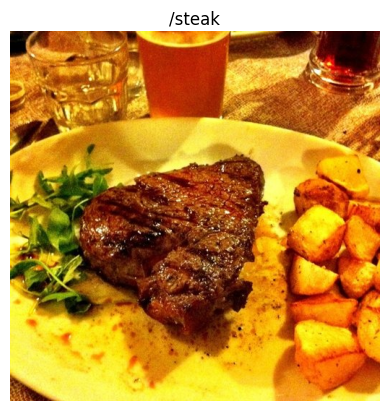

In [52]:
view_image("pizza_steak/train","/steak")

Image shape is: (512, 512, 3)
Image file name is['2774899.jpg']


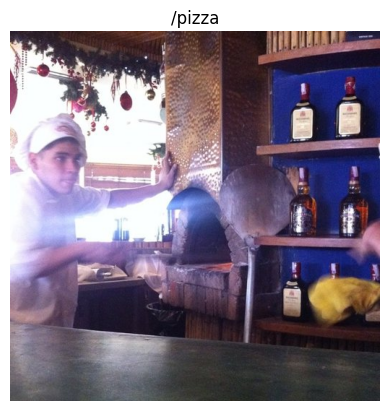

In [69]:
img=view_image("pizza_steak/train","/pizza")

## Lets build a Convoluational Neural Network
* Load the images
* Preprocess the images
* Create the CNN model
* Compile the CNN model
* Fit the CNN model

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
import random
import numpy as np

tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

train_data_gen=ImageDataGenerator(rescale=1/255.)
valid_data_gen=ImageDataGenerator(rescale=1/255.)


train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#importing data from directories and converting them into batches
train_data=train_data_gen.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)
valid_data=valid_data_gen.flow_from_directory(test_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)

#Creating a CNN model

Model_V1=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid")
                              ])

#Compiling our CNN Model

Model_V1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

#Fitting our model with train data

history_1=Model_V1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=(valid_data),validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.5388 - loss: 0.6925 - val_accuracy: 0.8200 - val_loss: 0.4389
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7764 - loss: 0.4574 - val_accuracy: 0.8340 - val_loss: 0.3871
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8015 - loss: 0.4312 - val_accuracy: 0.8500 - val_loss: 0.3416
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.8135 - loss: 0.3923 - val_accuracy: 0.8660 - val_loss: 0.3423
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8467 - loss: 0.3624 - val_accuracy: 0.7640 - val_loss: 0.4799


##Using a GPU to speed up the training process

In [59]:
#Epoch 1/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.5388 - loss: 0.6925 - val_accuracy: 0.8200 - val_loss: 0.4385
import random
import numpy as np

tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

train_data_gen=ImageDataGenerator(rescale=1/255.)
valid_data_gen=ImageDataGenerator(rescale=1/255.)


train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#importing data from directories and converting them into batches
train_data=train_data_gen.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)
valid_data=valid_data_gen.flow_from_directory(test_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)

#Creating a CNN model

Model_V2=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid")
                              ])

#Compiling our CNN Model

Model_V2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

#Fitting our model with train data

history_2=Model_V2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=(valid_data),validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.5388 - loss: 0.6925 - val_accuracy: 0.8180 - val_loss: 0.4388
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.7769 - loss: 0.4572 - val_accuracy: 0.8320 - val_loss: 0.3872
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8023 - loss: 0.4309 - val_accuracy: 0.8460 - val_loss: 0.3422
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.8130 - loss: 0.3929 - val_accuracy: 0.8720 - val_loss: 0.3429
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8447 - loss: 0.3655 - val_accuracy: 0.8100 - val_loss: 0.4037


The model trained using the GPU took 1/5 th of the time

In [60]:
Model_V2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Creating a normal classification Model for Comparison

In [61]:
Model_V3=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
                              ])
Model_V3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_3=Model_V3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.4948 - loss: 3.9940 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.4909 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.5096 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.5152 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932


WE can see that the normal classification model does not perform well compared to the CNN

In [62]:
Model_V3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having more than 20x more trainable parameters compared to our CNN it performs worst.

In [63]:
Model_V4=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
                              ])
Model_V4.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_4=Model_V4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.5721 - loss: 8.0191 - val_accuracy: 0.5780 - val_loss: 2.1455
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.7164 - loss: 0.9390 - val_accuracy: 0.7760 - val_loss: 0.5647
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7163 - loss: 1.2650 - val_accuracy: 0.7960 - val_loss: 0.4862
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.6894 - loss: 0.8617 - val_accuracy: 0.7960 - val_loss: 0.4799
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7573 - loss: 0.5162 - val_accuracy: 0.7400 - val_loss: 0.5386


In [64]:
Model_V4.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Breaking Down Binary Classification

### Visualizing the Data


Image shape is: (512, 512, 3)
Image file name is['3707493.jpg']
Image shape is: (446, 512, 3)
Image file name is['102037.jpg']


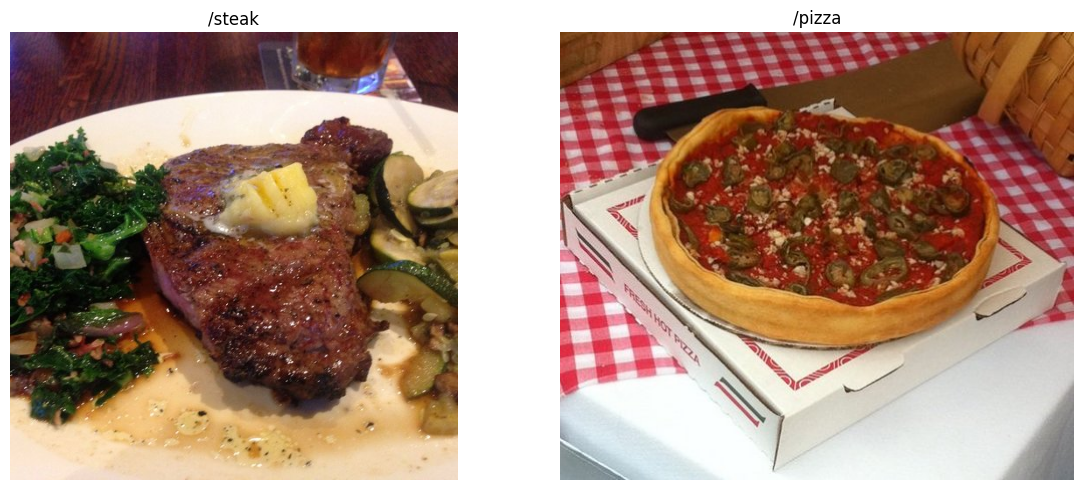

In [65]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
view_image("pizza_steak/train", "/steak")

plt.subplot(1, 2, 2)
view_image("pizza_steak/train", "/pizza")

plt.tight_layout()
plt.show()

### Preprocessing the Images : Normalizing the data within the range of 0 to 1  and creating batches.

note:Reason for making our dataset into batches is because our model may not able to look at all the images at once instead it looks at batches.Looking at all 10000 images may not be possible because we dont have that much VRAM in our GPU

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator=ImageDataGenerator(rescale=1./255)
valid_data_generator=ImageDataGenerator(rescale=1./255)

X_Train = train_data_generator.flow_from_directory("/content/pizza_steak/train",target_size=(224,224),class_mode="binary",batch_size=32)
X_Valid = valid_data_generator.flow_from_directory("/content/pizza_steak/test",target_size=(224,224),class_mode="binary",batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [75]:
images , labels=next(X_Train)

In [77]:
images.shape,labels.shape

((32, 224, 224, 3), (32,))

In [78]:
images[0],images[0].shape

(array([[[0.56078434, 0.63529414, 0.79215693],
         [0.5647059 , 0.6392157 , 0.7960785 ],
         [0.5647059 , 0.6392157 , 0.80392164],
         ...,
         [0.07843138, 0.08235294, 0.05882353],
         [0.08235294, 0.08235294, 0.07450981],
         [0.09803922, 0.09803922, 0.09803922]],
 
        [[0.5647059 , 0.6392157 , 0.7960785 ],
         [0.5568628 , 0.6313726 , 0.7960785 ],
         [0.5568628 , 0.6313726 , 0.7960785 ],
         ...,
         [0.09803922, 0.10196079, 0.07058824],
         [0.0627451 , 0.06666667, 0.04705883],
         [0.04313726, 0.04313726, 0.03529412]],
 
        [[0.5686275 , 0.6431373 , 0.8078432 ],
         [0.5647059 , 0.6392157 , 0.80392164],
         [0.5647059 , 0.6392157 , 0.8078432 ],
         ...,
         [0.07450981, 0.07843138, 0.04705883],
         [0.15686275, 0.16078432, 0.13725491],
         [0.21568629, 0.21960786, 0.20000002]],
 
        ...,
 
        [[0.3921569 , 0.34901962, 0.22352943],
         [0.39607847, 0.3529412 , 0.23529